# FRAUD PROJECT

# Importing the dataset 

In [90]:
#Importing the different libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
#Importing the files
df = pd.read_csv('C:\\Users\\TopHighTech.fr\\Documents\\JEDHA\\FULL_STACK_12_WEEK_PROGRAM-master (1)\\FULL_STACK_12_WEEK_PROGRAM-master\\S0.4 -- Réduction de Dimensions & Boosting\\Projet -- FRAUDULENT ACTIVITIES\\Datasets\\Fraud_Data.csv')
ip_country = pd.read_csv('C:\\Users\\TopHighTech.fr\\Documents\\JEDHA\\FULL_STACK_12_WEEK_PROGRAM-master (1)\\FULL_STACK_12_WEEK_PROGRAM-master\\S0.4 -- Réduction de Dimensions & Boosting\\Projet -- FRAUDULENT ACTIVITIES\\Datasets\\IpAddress_to_Country.csv')

## Preparing the dataframe

In [4]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [18]:
df.shape

(151112, 11)

In [25]:
ip.sample(6)

,lower_bound_ip_address,upper_bound_ip_address,country
36010,2.030567e+09,2031091711,China
53420,3.053453e+09,3054501887,Indonesia
127260,3.454805e+09,3454805247,Canada
81546,3.253710e+09,3253710847,United Kingdom
138074,3.659399e+09,3659530239,China
10101,1.127989e+09,1127993343,United States


In [19]:
ip.shape

(138846, 3)

In [28]:
#Defining functions to match the participant's ip address to the country 
#Creating a new column in the DataFrame for the countries
#Warning : This process takes time

def match_country_to_ip(ip=None):
    
    match = (ip <= ip_country['upper_bound_ip_address']) & ( ip >= ip_country['lower_bound_ip_address'])
    if match.any():
        return ip_country['country'][match].to_string(index=False)
    else:
        return 'unknown'
    
def add_countries():
    df['country'] = df['ip_address'].apply(lambda x: match_country_to_ip(x))

add_countries()

In [30]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [32]:
#Exporting the new dataframe so we can upload it later if we need to
export_csv = df.to_csv (r'C:\\Users\\TopHighTech.fr\\Documents\\JEDHA\\FULL_STACK_12_WEEK_PROGRAM-master (1)\\FULL_STACK_12_WEEK_PROGRAM-master\\S0.4 -- Réduction de Dimensions & Boosting\\Projet -- FRAUDULENT ACTIVITIES\\Datasets\\export_dataset.csv', index = None, header=True)

In [4]:
#Import the df again if needed
df = pd.read_csv('C:\\Users\\TopHighTech.fr\\Documents\\JEDHA\\FULL_STACK_12_WEEK_PROGRAM-master (1)\\FULL_STACK_12_WEEK_PROGRAM-master\\S0.4 -- Réduction de Dimensions & Boosting\\Projet -- FRAUDULENT ACTIVITIES\\Datasets\\export_dataset.csv')


## Exploring the dataframe

### Checking the missing values

In [46]:
df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
country           0
dtype: int64

In [116]:
df.isnull().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
class             False
country           False
dtype: bool

In [47]:
df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


- It looks like there is no missing values and no outliers

### Relationship between countries and fraud

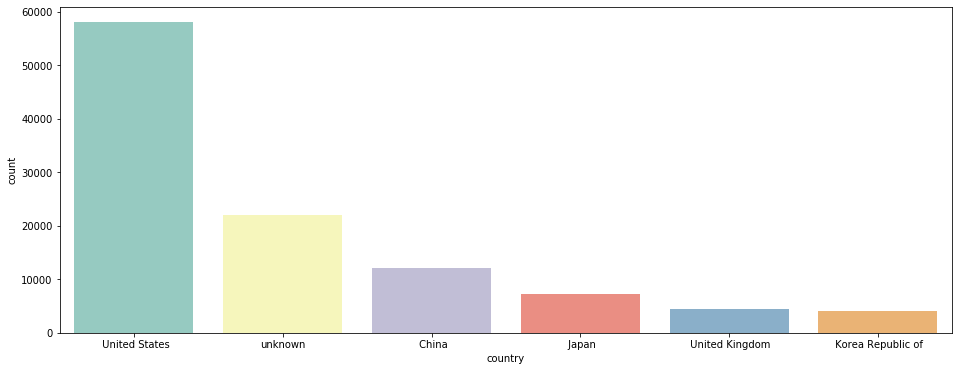

In [45]:
#Frequencies of the different countries 
plt.figure(figsize=(16, 6))
_= sns.countplot(df.country,order=df.country.value_counts().iloc[:6].index,palette="Set3")

In [81]:
#Calculating the percentage of Fraud by Country
pd.crosstab(df['class'],df['country']).apply(lambda r: r/r.sum(), axis=1)

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Virgin Islands (U.S.),Yemen,Zambia,Zimbabwe,unknown
class,,,,,,,,,,,,,,,,,,,,,
0,0.000037,0.000095,0.000796,0.000168,0.000022,0.004344,0.000095,0.012259,0.002935,0.000153,...,0.000548,0.000058,0.000007,0.001592,0.003746,0.000015,0.000007,0.000073,0.000044,0.146633
1,0.000071,0.000000,0.000919,0.000071,0.000000,0.004664,0.000141,0.011660,0.002332,0.000141,...,0.000353,0.000141,0.000000,0.002332,0.002615,0.000071,0.000000,0.000000,0.000000,0.133065


In [49]:
total_fraud = df['class'].sum()
country_fraud = df.groupby('country').sum()
sorted_country_fraud = country_fraud['class'].sort_values(ascending=False)
    
y = sorted_country_fraud[:6]/float(total_fraud)
x = np.arange(len(y))


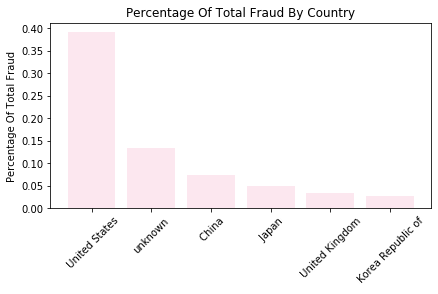

In [103]:
#Plotting the percentage of fraud for 6 most present countries
fig, ax = plt.subplots()


ax.bar(x, y, color = (0.9,0.1,0.4,0.1))
ax.set_ylabel('Percentage Of Total Fraud')
ax.set_title('Percentage Of Total Fraud By Country')
ax.set_xticks(x)
ax.set_xticklabels(sorted_country_fraud.index.values[:6], rotation=45)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

- Lots of unknown countries
- US have the highest number of fraud

### Relationship between Gender and Fraud

In [51]:
df['class'].groupby(df.sex).value_counts()

sex  class
F    0        57102
     1         5717
M    0        79859
     1         8434
Name: class, dtype: int64

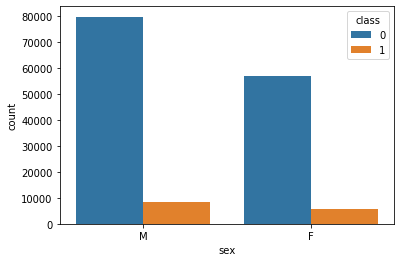

In [56]:
_=sns.countplot(df['sex'], hue = df['class'])

In [70]:
#Calculating the percentage of Male and female who have committed Fraud
pd.crosstab(df['class'],df['sex']).apply(lambda r: r/r.sum(), axis=1)

sex,F,M
class,,
0,0.416922,0.583078
1,0.404000,0.596000


- It seems like their no significant relationship between the gender and commiting fraud

### Relationship between broswer and fraud

In [67]:
df['class'].groupby(df.browser).value_counts()

browser  class
Chrome   0        55363
         1         6069
FireFox  0        22268
         1         2342
IE       0        33540
         1         3187
Opera    0         3348
         1          328
Safari   0        22442
         1         2225
Name: class, dtype: int64

In [69]:
#Calculating the percentage of fraud committed using each browser
pd.crosstab(df['class'],df['browser']).apply(lambda r: r/r.sum(), axis=1)

browser,Chrome,FireFox,IE,Opera,Safari
class,,,,,
0,0.404225,0.162586,0.244887,0.024445,0.163857
1,0.428874,0.165501,0.225214,0.023179,0.157233


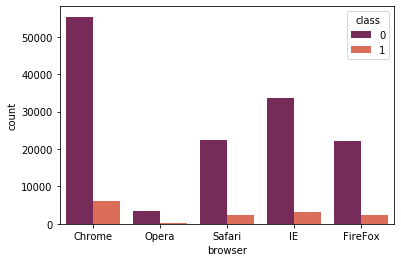

In [89]:
_=sns.countplot(df['browser'], hue = df['class'],palette="rocket",)

In [112]:
total_fraud = df['class'].sum()
browser_fraud = df.groupby('browser').sum()
sorted_browser_fraud = browser_fraud['class'].sort_values(ascending=False)
    
y_b = sorted_browser_fraud[:6]/float(total_fraud)
x_b = np.arange(len(y_b))

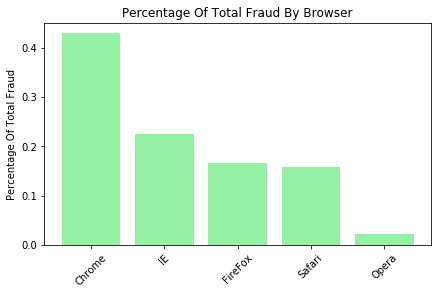

In [118]:
#Plotting the percentage of fraud committed using each browser    
fig, ax = plt.subplots()

ax.bar(x_b, y_b, color = (0.3,0.9,0.4,0.6))
ax.set_ylabel('Percentage Of Total Fraud')
ax.set_title('Percentage Of Total Fraud By Browser')
ax.set_xticks(x_b)
ax.set_xticklabels(sorted_browser_fraud.index.values[:6], rotation=45)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

- Fraud is often committed by using a Chrome browser

### Relationship between Devide Id and Fraud

In [266]:
#Check for duplicates in columns
#It seems likes some devices are used several times.

boolean = any(df['user_id'].duplicated())
df['user_id'].duplicated()
df.head()
print('Duplicates in User Id : ', len(df['user_id'].unique()) < len(df.index))
print('Duplicates in Device Id : ', len(df['device_id'].unique()) < len(df.index))
print('Duplicates in Ip Address : ', len(df['ip_address'].unique()) < len(df.index))

Duplicates in User Id :  False
Duplicates in Device Id :  True
Duplicates in Ip Address :  True


In [267]:
df['device_id'].value_counts()

EQYVNEGOFLAWK    20
KIPFSCNUGOLDP    20
ITUMJCKWEYNDD    20
NGQCKIADMZORL    20
ZUSVMDEZRBDTX    20
CQTUVBYIWWWBC    20
BWSMVSLCJXMCM    19
SDJQRPKXQFBED    19
IGKYVZDBEGALB    19
CDFXVYHOIHPYP    19
EGLGSEGYPMMAM    19
XJWEQEWCBRAKD    18
OGBNHQHDZLGFZ    18
UFBULQADXSSOG    18
TAODVYWZTHMTO    18
RWZCXZTQUORQL    18
QVMVTZOIJDKNR    18
FFWAQIABHGYJC    18
XHZBVWFWHSGTQ    18
GTIYVLCMAYBFA    18
KPAAACGRQWYIK    18
KGXODJJIWSJJE    17
IRVIFDVZMRXOU    17
RWCELJOVGBDVR    17
QRMOMDDTIIUVW    17
HGVNRPOHIBZLJ    17
FHNLMUKPGJGPZ    17
DNEKXSIEGFBWD    17
SUEKLSZWLASFR    17
BTHAZGNCVFIVZ    17
                 ..
RYXKKUOYPTEVG     1
AELSSYTCOWAEL     1
KUOJPOIWFWHRL     1
TGFEFQQRUXGVW     1
IVQZEFRWBTCQZ     1
HFUUVHZHJUDVJ     1
SDZEUZIRAFJLA     1
QCFJVEHAZXQXI     1
NTQVDTXYWESVD     1
QJTKMHSFHBYWQ     1
LOYPVTVQYOXNG     1
KEKVAFQWQHXFX     1
AGDLMQJCERYNZ     1
VZMJVBIWHYKUM     1
PHINYUMMRESLN     1
MQGPATYCZYUQW     1
BRKLLCIOQHJZO     1
ATMPLNOIAKWUC     1
YLKJZJWDINJZA     1


In [129]:
#Checking if the same device committed Fraud or not
#We can see that the same device is used 20 times for fraud that happened in 1 second with different user_id
df[df['device_id'] == 'EQYVNEGOFLAWK']

,Unnamed: 0,Unnamed: 0.1,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_nbr,device_count,age_cat
8829,8829,8829,386159,2015-01-08 09:55:00,2015-01-08 09:55:01,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40
25075,25075,25075,32103,2015-01-08 09:55:07,2015-01-08 09:55:08,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40
33736,33736,33736,186374,2015-01-08 09:54:59,2015-01-08 09:55:00,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40
54243,54243,54243,324451,2015-01-08 09:55:08,2015-01-08 09:55:09,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40
56906,56906,56906,57405,2015-01-08 09:55:01,2015-01-08 09:55:02,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40
57883,57883,57883,177297,2015-01-08 09:55:05,2015-01-08 09:55:06,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40
60370,60370,60370,357870,2015-01-08 09:55:09,2015-01-08 09:55:10,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40
68590,68590,68590,131342,2015-01-08 09:54:55,2015-04-14 16:18:25,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,0,United States,20,More than 10,30-40
71066,71066,71066,94837,2015-01-08 09:55:04,2015-01-08 09:55:05,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40
75467,75467,75467,46845,2015-01-08 09:55:02,2015-01-08 09:55:03,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,20,More than 10,30-40


In [ ]:
#Creating a new column indicating how many time the same device was used
#Warning : pretty long to process
df['device_count'] = df['device_id'].apply(lambda x : df['device_id'].value_counts(x))

In [23]:
#Reimporting the dataset after the process above
df = pd.read_csv('C:\\Users\\TopHighTech.fr\\Documents\\JEDHA\\FULL_STACK_12_WEEK_PROGRAM-master (1)\\FULL_STACK_12_WEEK_PROGRAM-master\\S0.4 -- Réduction de Dimensions & Boosting\\Projet -- FRAUDULENT ACTIVITIES\\Datasets\\fraude_v2.csv')

In [24]:
df['device_count'] = df['device_nbr'].apply(lambda x : "Unique" if x == 1
                                           else "2-10" if 2 <= x <=10
                                           else "More than 10")

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_nbr,device_count
0,0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,Unique
1,1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,Unique
2,2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,More than 10
3,3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,1,Unique
4,4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,Unique


### More exploratory research

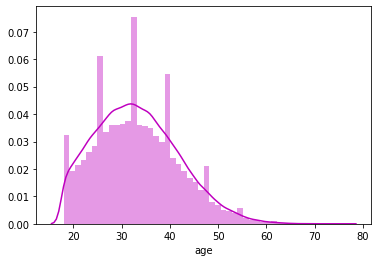

In [16]:
#Plotting the age distribution
#No outlier noted
_=sns.distplot(df_clean.age, color="m")

In [25]:
#Creating Age categories
df['age_cat'] = df['age'].apply(lambda x: '<20' if x < 20
                                else '20-30' if 20 <= x < 30
                                else '30-40' if 30 <= x < 40
                                else '50-60' if 50 <= x < 60
                                else '>60')

0    136961
1     14151
Name: class, dtype: int64


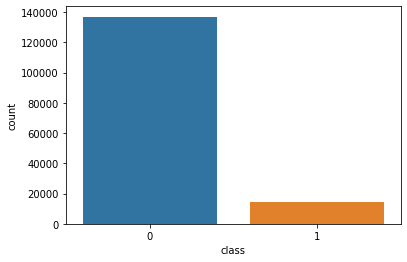

In [215]:
_=sns.countplot(df['class'])
print(df['class'].value_counts())

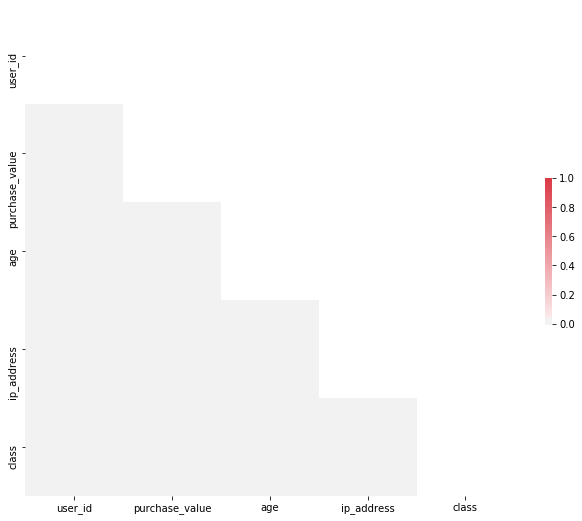

In [120]:
# Check correlations
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap = cmap, square=True,  
            center=0, cbar_kws={"shrink": .3})

- It seems like there is no significant correlation between the quantitative variables

## Cleaning the dataset

In [26]:
#Dropping useless columns
df_clean = df.drop(['user_id','device_id','ip_address'],axis = 1)

In [27]:
#Transforming the signup time and purchase time into an interval called time_interval
from datetime import datetime

act_of_purchase = df_clean['purchase_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
act_of_signing = df_clean['signup_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

df_clean['time_interval'] = act_of_purchase - act_of_signing
df_clean['time_interval'] = df_clean['time_interval'].apply(lambda x: x.seconds)
df_clean

,Unnamed: 0,Unnamed: 0.1,signup_time,purchase_time,purchase_value,source,browser,sex,age,class,country,device_nbr,device_count,age_cat,time_interval
0,0,0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,M,39,0,Japan,1,Unique,30-40,13882
1,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,F,53,0,United States,1,Unique,50-60,17944
2,2,2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,M,53,1,United States,12,More than 10,50-60,1
3,3,3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,M,41,0,Unknown,1,Unique,>60,60085
4,4,4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,M,45,0,United States,1,Unique,>60,41461
5,5,5,2015-05-21 06:03:03,2015-07-09 08:05:14,42,Ads,Chrome,M,18,0,Canada,1,Unique,<20,7331
6,6,6,2015-08-01 22:40:52,2015-08-27 03:37:57,11,Ads,Chrome,F,19,0,Unknown,1,Unique,<20,17825
7,7,7,2015-04-06 07:35:45,2015-05-25 17:21:14,27,Ads,Opera,M,34,0,United States,1,Unique,30-40,35129
8,8,8,2015-04-21 23:38:34,2015-06-02 14:01:54,30,SEO,IE,F,43,0,China,1,Unique,>60,51800
9,9,9,2015-01-25 17:49:49,2015-03-23 23:05:42,62,Ads,IE,M,31,0,United States,1,Unique,30-40,18953


In [28]:
#Further cleaning
df_clean = df_clean.drop(['signup_time','Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [29]:
df_clean.head()

,purchase_time,purchase_value,source,browser,sex,age,class,country,device_nbr,device_count,age_cat,time_interval
0,2015-04-18 02:47:11,34,SEO,Chrome,M,39,0,Japan,1,Unique,30-40,13882
1,2015-06-08 01:38:54,16,Ads,Chrome,F,53,0,United States,1,Unique,50-60,17944
2,2015-01-01 18:52:45,15,SEO,Opera,M,53,1,United States,12,More than 10,50-60,1
3,2015-05-04 13:54:50,44,SEO,Safari,M,41,0,Unknown,1,Unique,>60,60085
4,2015-09-09 18:40:53,39,Ads,Safari,M,45,0,United States,1,Unique,>60,41461


In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
class             151112 non-null int64
country           151112 non-null object
device_nbr        151112 non-null int64
device_count      151112 non-null object
age_cat           151112 non-null object
time_interval     151112 non-null int64
dtypes: int64(5), object(7)
memory usage: 13.8+ MB


In [34]:
#Creating categories for the different purchase hours

df_clean['purchase_format'] = df_clean['purchase_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df_clean['purchase_hour'] = df_clean['purchase_format'].apply(lambda x: x.hour)
df_clean['hour_cat'] = df_clean['purchase_hour'].apply(lambda x: 'Morning' if 7<=x<=12
                                                    else 'Afternoon' if 12<x<=17
                                                    else 'Evening' if 18<=x<=23
                                                    else 'Night')


In [35]:
#Creating categories for the different purchase day
df_clean["purchase_day"] = df_clean['purchase_format'].apply(lambda x: x.weekday())

In [36]:
df_clean = df_clean.drop(['purchase_time','purchase_format','purchase_hour'], axis=1)


In [37]:
df_clean.head()

,purchase_value,source,browser,sex,age,class,country,device_nbr,device_count,age_cat,time_interval,hour_cat,purchase_day
0,34,SEO,Chrome,M,39,0,Japan,1,Unique,30-40,13882,Night,5
1,16,Ads,Chrome,F,53,0,United States,1,Unique,50-60,17944,Night,0
2,15,SEO,Opera,M,53,1,United States,12,More than 10,50-60,1,Evening,3
3,44,SEO,Safari,M,41,0,Unknown,1,Unique,>60,60085,Afternoon,0
4,39,Ads,Safari,M,45,0,United States,1,Unique,>60,41461,Evening,2


In [38]:
#Exporting the new dataframe so we can upload it later if we need to
export_csv_2 = df_clean.to_csv (r'C:\\Users\\TopHighTech.fr\\Documents\\JEDHA\\FULL_STACK_12_WEEK_PROGRAM-master (1)\\FULL_STACK_12_WEEK_PROGRAM-master\\S0.4 -- Réduction de Dimensions & Boosting\\Projet -- FRAUDULENT ACTIVITIES\\Datasets\\final_df.csv', index = None, header=True)

In [39]:
#Reimporting the final df
df_clean = pd.read_csv('C:\\Users\\TopHighTech.fr\\Documents\\JEDHA\\FULL_STACK_12_WEEK_PROGRAM-master (1)\\FULL_STACK_12_WEEK_PROGRAM-master\\S0.4 -- Réduction de Dimensions & Boosting\\Projet -- FRAUDULENT ACTIVITIES\\Datasets\\final_df.csv')
df_clean.head()

,purchase_value,source,browser,sex,age,class,country,device_nbr,device_count,age_cat,time_interval,hour_cat,purchase_day
0,34,SEO,Chrome,M,39,0,Japan,1,Unique,30-40,13882,Night,5
1,16,Ads,Chrome,F,53,0,United States,1,Unique,50-60,17944,Night,0
2,15,SEO,Opera,M,53,1,United States,12,More than 10,50-60,1,Evening,3
3,44,SEO,Safari,M,41,0,Unknown,1,Unique,>60,60085,Afternoon,0
4,39,Ads,Safari,M,45,0,United States,1,Unique,>60,41461,Evening,2


## Building the model

In [117]:
# Separate target variable Y from features X

features_list = ["time_interval", "device_count","source","browser","sex", "age_cat","hour_cat","purchase_day", "purchase_value"]
target_variable = "class"

X = df_clean.loc[:,features_list]
Y = df_clean.loc[:,target_variable]

X.head()
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [118]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['time_interval', 'purchase_day', 'purchase_value']  at positions  [0, 7, 8]
Found categorical features  ['device_count', 'source', 'browser', 'sex', 'age_cat', 'hour_cat']  at positions  [1, 2, 3, 4, 5, 6]


In [119]:
# Divide dataset Train set & Test set 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0 , stratify = Y)

In [120]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

### Training pipeline - RandomForest

In [112]:
# Encoding categorical features and standardizing numerical features

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)

In [113]:
# Train model with GridSearch and cross-validation
RF = RandomForestClassifier(class_weight = {0: .9, 1: .1})
params = {'n_estimators' : [15,20],
   'max_depth' : [6,8],
    'max_features':[2,3]}


best_clf_RF = GridSearchCV(RF, params, cv = 5)

best_clf_RF.fit(X_train, Y_train)

# Predictions on training set
Y_train_pred_RF = best_clf_RF.predict(X_train)


In [114]:
best_clf_RF.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 20}

### Test Pipeline - RandomForest

In [115]:
# Encoding categorical features and standardizing numerical features
X_test = featureencoder.transform(X_test)

# Predictions on test set
Y_test_pred_RF = best_clf_RF.predict(X_test)


### Performance assessment - RandomForest

In [116]:
#Printing the different scores to assess the model

f1_RF = f1_score(Y_train, Y_train_pred_RF)
f1_RF = f1_score(Y_test, Y_test_pred_RF)
print("F1 on score train set : ", f1_score(Y_train, Y_train_pred_RF))
print("F1 score on test set : ", f1_score(Y_test, Y_test_pred_RF))

p_RF = precision_score(Y_train, Y_train_pred_RF)
p_RF = precision_score(Y_test, Y_test_pred_RF)
print("Precision on train set : ", precision_score(Y_train, Y_train_pred_RF))
print("Precision on test set : ", precision_score(Y_test, Y_test_pred_RF))

                
r_RF = recall_score(Y_train, Y_train_pred_RF)
r_RF = recall_score(Y_test, Y_test_pred_RF)               
print("Recall on train set : ", recall_score(Y_train, Y_train_pred_RF))
print("Recall on test set : ", recall_score(Y_test, Y_test_pred_RF))

fpr_RF, tpr_RF, _ = roc_curve(Y_test, Y_test_pred_RF)

print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred_RF))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred_RF))
print()



F1 on score train set :  0.6962630275810444
F1 score on test set :  0.7089416058394161
Precision on train set :  1.0
Precision on test set :  1.0
Recall on train set :  0.5340517622118187
Recall on test set :  0.5491166077738516
Confusion matrix on train set : 
[[109568      0]
 [  5275   6046]]

Confusion matrix on test set : 
[[27393     0]
 [ 1276  1554]]



In [57]:
best_clf_RF.best_estimator_.feature_importances_ 

array([1.34403097e-03, 7.43138101e-04, 6.99551129e-04, 5.39179291e-04,
       3.88998487e-04, 4.34569018e-04, 7.29874361e-04, 5.83659961e-04,
       1.75596993e-04, 2.45018366e-04, 2.28059819e-04, 6.89492091e-04,
       9.38731275e-04, 4.69549940e-04, 1.59439439e-01, 5.56880692e-02,
       4.62105931e-03, 7.69901883e-01, 2.14010000e-03])

### Training pipeline - Gradient Boosting

In [121]:
# Encoding categorical features and standardizing numerical features

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)

In [123]:
# Train model with GridSearch and cross-validation
GB = GradientBoostingClassifier()
params = {'n_estimators' : [10,15]}


best_clf_GB = GridSearchCV(GB, params, cv = 5)

best_clf_GB.fit(X_train, Y_train)

# Predictions on training set
Y_train_pred_GB = best_clf_GB.predict(X_train)


In [124]:
best_clf_GB.best_params_

{'n_estimators': 10}

### Test Pipeline - Gradient Boosting

In [125]:
# Encoding categorical features and standardizing numerical features
X_test = featureencoder.transform(X_test)

# Predictions on test set
Y_test_pred_GB = best_clf_RF.predict(X_test)

### Performance assessment - Gradient Boosting

In [126]:
#Printing the different scores to assess the model

f1_GB = f1_score(Y_train, Y_train_pred_GB)
f1_GB = f1_score(Y_test, Y_test_pred_GB)
print("F1 on score train set : ", f1_score(Y_train, Y_train_pred_GB))
print("F1 score on test set : ", f1_score(Y_test, Y_test_pred_GB))

p_GB = precision_score(Y_train, Y_train_pred_GB)
p_GB = precision_score(Y_test, Y_test_pred_GB)
print("Precision on train set : ", precision_score(Y_train, Y_train_pred_GB))
print("Precision on test set : ", precision_score(Y_test, Y_test_pred_GB))

                
r_GB = recall_score(Y_train, Y_train_pred_GB)
r_GB = recall_score(Y_test, Y_test_pred_GB)               
print("Recall on train set : ", recall_score(Y_train, Y_train_pred_GB))
print("Recall on test set : ", recall_score(Y_test, Y_test_pred_GB))

fpr_GB, tpr_GB, _ = roc_curve(Y_test, Y_test_pred_GB)

print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred_GB))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred_GB))
print()


F1 on score train set :  0.6962229387379087
F1 score on test set :  0.7089416058394161
Precision on train set :  0.9998346287415247
Precision on test set :  1.0
Recall on train set :  0.5340517622118187
Recall on test set :  0.5491166077738516
Confusion matrix on train set : 
[[109567      1]
 [  5275   6046]]

Confusion matrix on test set : 
[[27393     0]
 [ 1276  1554]]



### Comparing the models

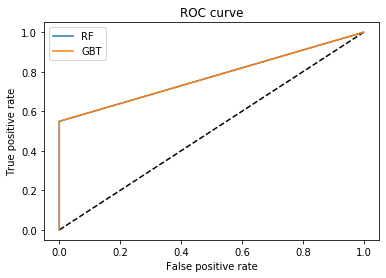

In [127]:
##Plotting the Roc Curve of each model to see which predicts best
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF, tpr_RF, label='RF')
plt.plot(fpr_GB, tpr_GB, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

- It seems like both model predict the same since we can't even the blue line. Maybe we do not have enough variables to predict the outcomes better. 